In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [9]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [11]:
df.iloc[5:10, 0] = np.nan

In [13]:
df.fillna(df.mean(), inplace=True)

In [15]:
df['species'] = df['species'].map({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginical'
})

In [17]:
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-2])

scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)


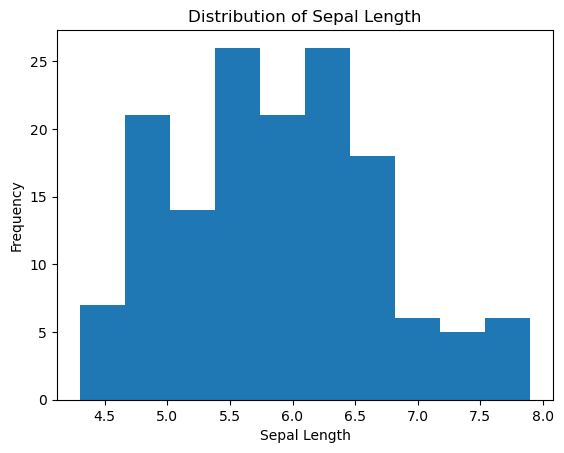

In [21]:
plt.hist(df['sepal length (cm)'], bins=10)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()


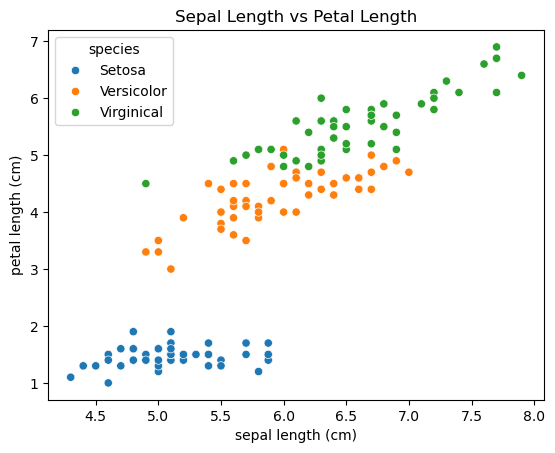

In [23]:
sns.scatterplot(
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='species',
    data=df
)
plt.title('Sepal Length vs Petal Length')
plt.show()


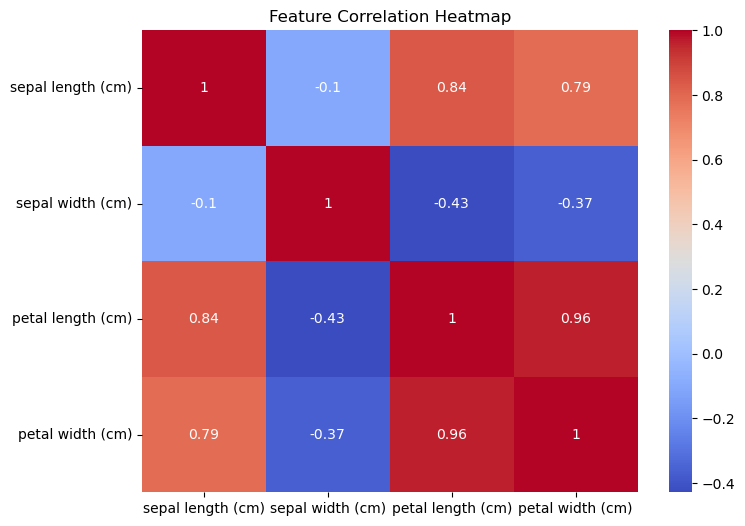

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.iloc[:, :-2].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Feature Correlation Heatmap')
plt.show()
